In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
path = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Specialization/Task 2.4/Data'

In [3]:
df_2 = pd.read_csv(os.path.join(path, 'answered_cleand.csv'))

In [4]:
df = pd.read_csv(os.path.join(path, 'predicted_weather_cleand.csv'))

In [5]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressue,STOCKHOLM_humidity
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,

In [6]:
df.shape

(22950, 137)

In [7]:
df_2

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_2.shape

(22950, 16)

In [9]:
answers = df_2 

In [10]:
df_madrid= df[['MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',]]
df_madrid.head()

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.0,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.0,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.0,7.8,12.1,8.2,16.0


In [11]:
df_madrid.shape

(22950, 9)

In [12]:
answers_madrid = df_2[['MUNCHENB_pleasant_weather']]
answers_madrid

,MUNCHENB_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [13]:
X = df_madrid

In [14]:
Y = answers_madrid

In [15]:
Y = answers_madrid.max(axis=1)
print("Shape Y:")

Shape Y:


In [16]:
print(X.shape)
print(Y.shape)

(22950, 9)
(22950,)


In [17]:
# Split data into train and test set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 42)

In [18]:
# Check shapes
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## GRID SEARCH for all avalible years for Madrid

In [19]:
# creating a RF classifier
clf = RandomForestClassifier()

In [20]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [21]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, Y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.793 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.792 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.792 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END m

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.792 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.6s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.792 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.810 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.795 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.792 total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_spl

Search took 2.444947103659312 minutes


In [22]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 0.8107716074566188


## RANDOM SEARCH for all avalible years for Madrid

In [23]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }


In [24]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [29]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, Y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.792 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.801 total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.792 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.792 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.792 total time=   0.0s
[CV 1/3] EN

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.794 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.800 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_sp

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.802 total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=1, 

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_spli

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.792 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.792 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.792 total time=   0.6s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.792 total time=   0.5s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.810 total time=   1.0s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, min_sampl

Search took 6.497492551803589 minutes


In [30]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 110}
Best RANDOM search score is: 0.8096097421949562


In [31]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 0.8107716074566188
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 110}
Best RANDOM search score is: 0.8096097421949562


In [34]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 10, max_depth= 3, max_features=7, min_samples_leaf=1, min_samples_split=2, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=7,
                       n_estimators=10)

In [35]:
# performing predictions on the test dataset
Y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Model Accuracy:  0.8053328685953294


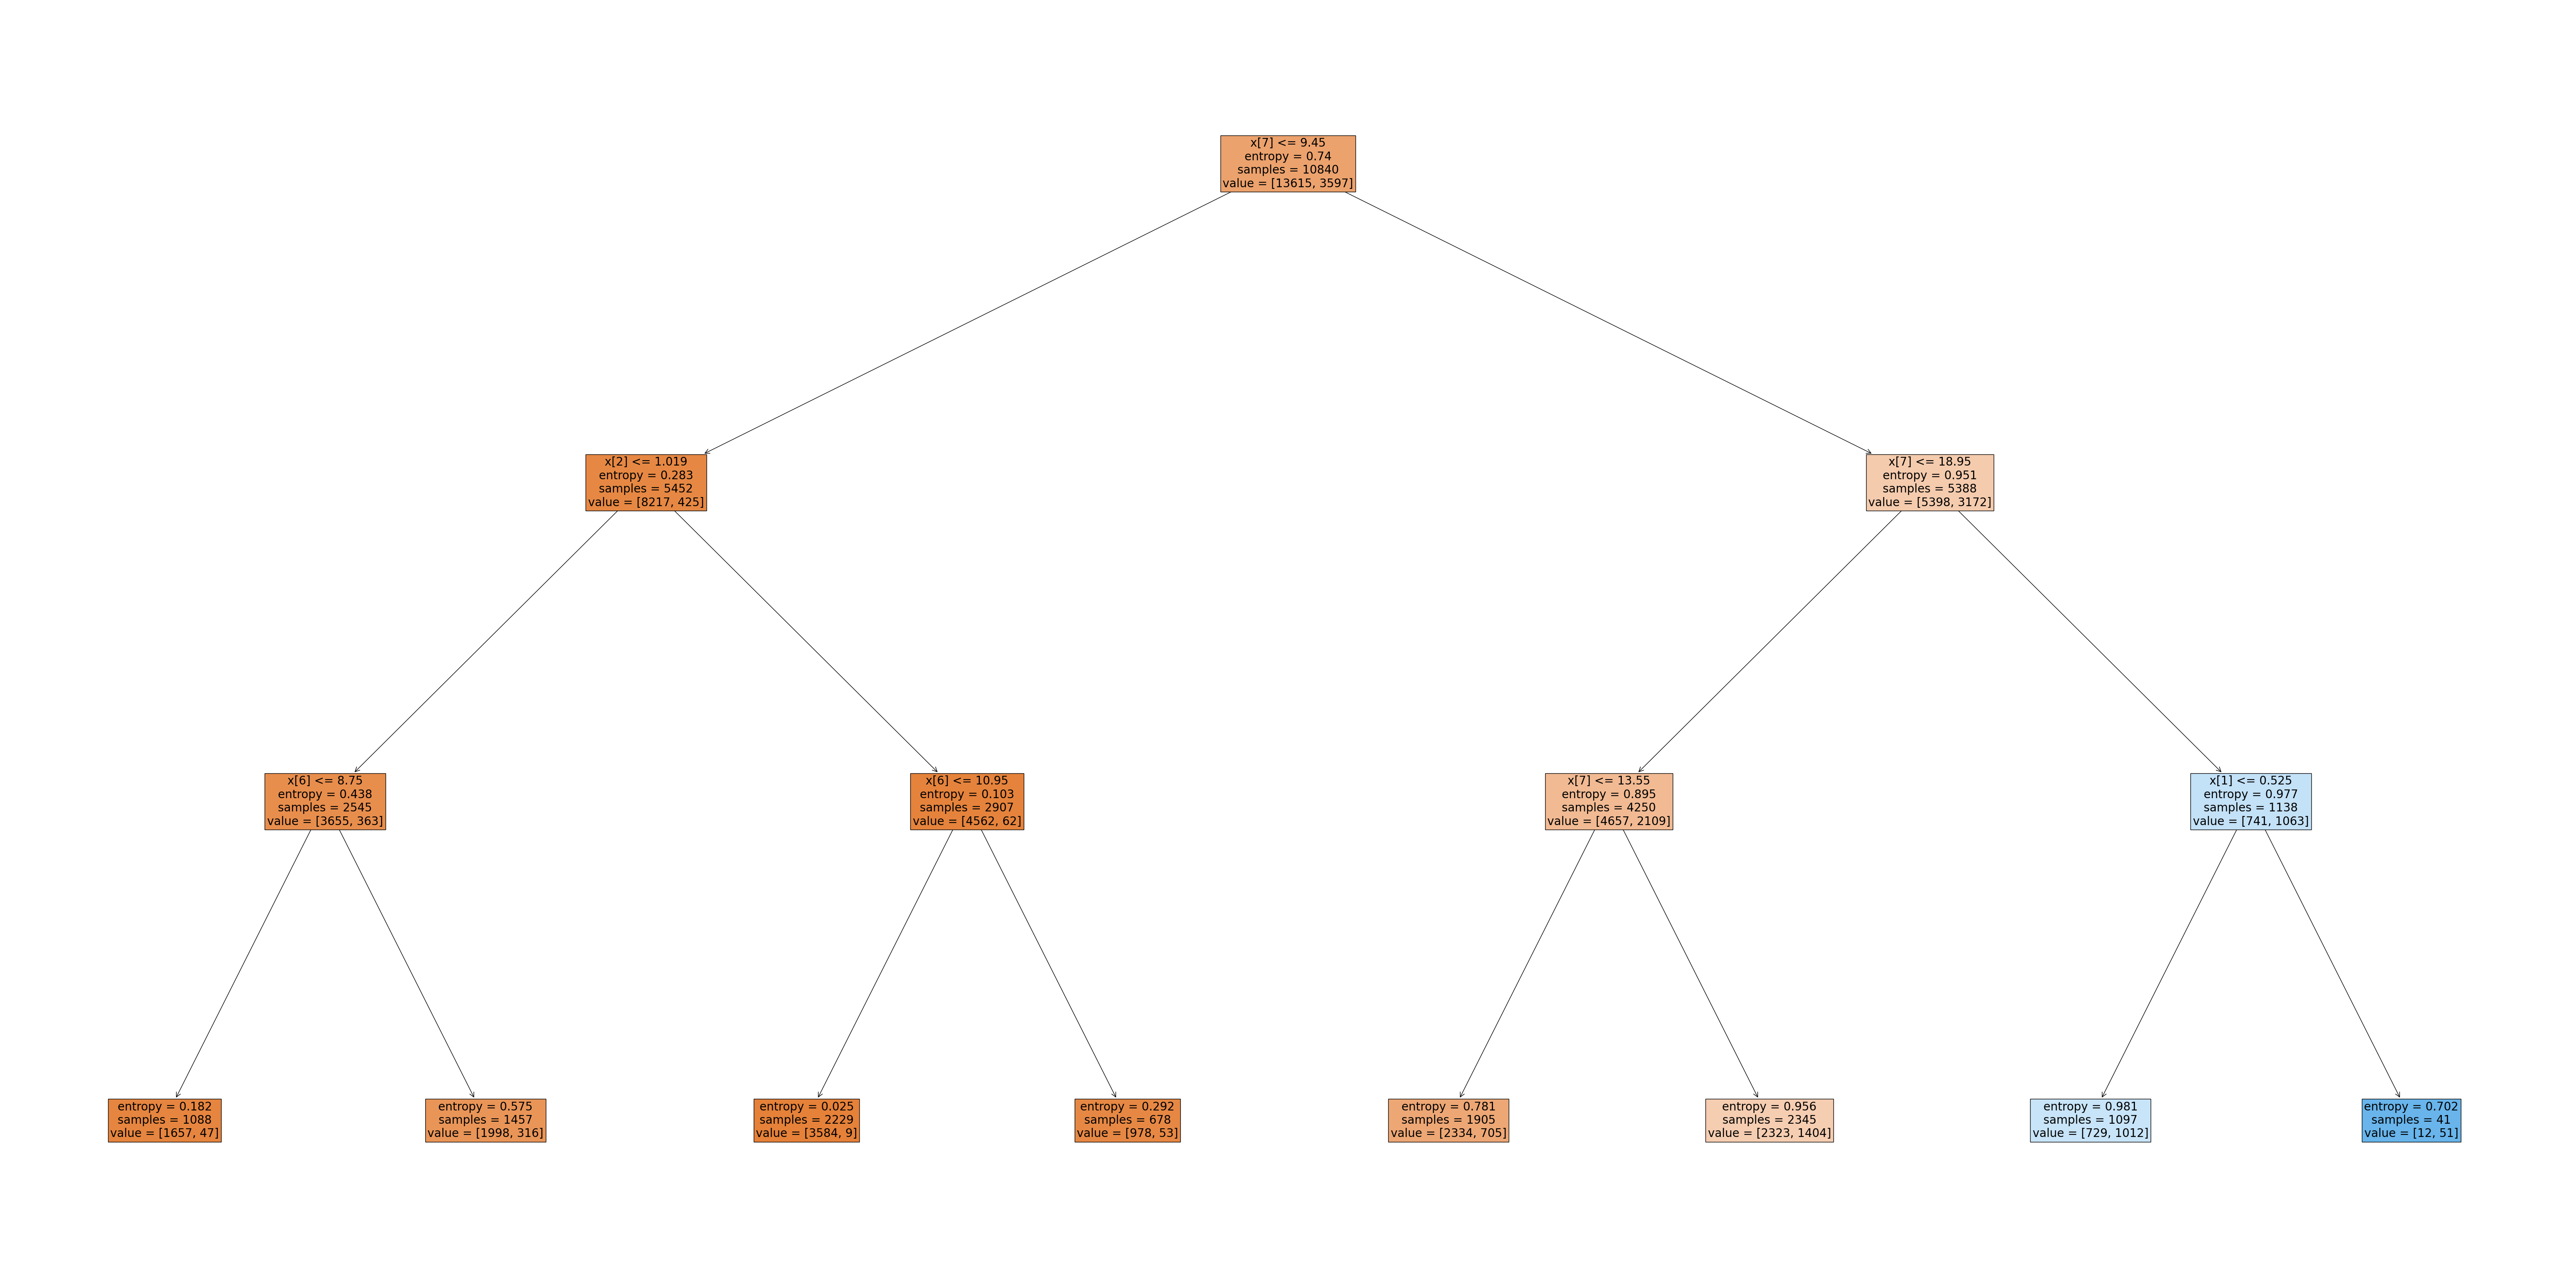

In [39]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[9], fontsize = 20, filled=True);

In [40]:
Values = ['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max'
      ]

In [42]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00000000e+00, 3.45659702e-04, 5.68392824e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.74907466e-01, 6.64227066e-01,
       3.68052610e-03])

In [43]:
np.set_printoptions(threshold=1000)

In [44]:
important = pd.Series(newarray, index = Values) #.sort_values(ascending = False)
important

cloud_cover         0.000000
humidity            0.000346
pressure            0.056839
global_radiation    0.000000
precipitation       0.000000
sunshine            0.000000
temp_mean           0.274907
temp_min            0.664227
temp_max            0.003681
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


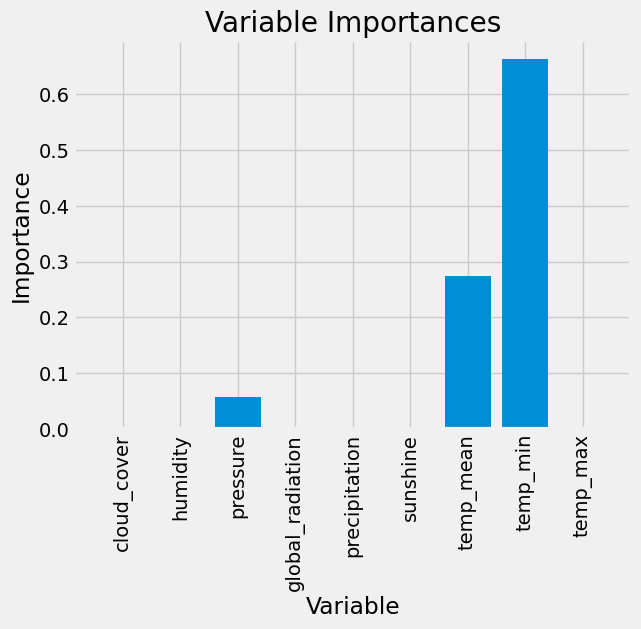

In [45]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(Values)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, Values, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');